<a href="https://colab.research.google.com/github/juanivazquez/SdT/blob/main/Granger%26Newbold%5B1973%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Spurious Regressions in Econometrics"**

*Granger & Newbold (1973)*

Replication in R with FPP3




# i.Settings

In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
%%R
install.packages('fpp3')
install.packages('car')
install.packages('haven')

(as ‘lib’ is unspecified)















































































	‘/tmp/Rtmp4NPvYz/downloaded_packages’

(as ‘lib’ is unspecified)










































































	‘/tmp/Rtmp4NPvYz/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp4NPvYz/downloaded_packages’



In [4]:
%%R 
library(fpp3)
library(car)
library(haven)


✔ dplyr       1.0.9     ✔ tsibbledata 0.4.1
✔ tidyr       1.2.0     ✔ feasts      0.3.0
✔ lubridate   1.8.0     ✔ fable       0.3.2
✔ ggplot2     3.3.6     

✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()


Attaching package: ‘car’



    recode




In [ ]:
# %%R
# str(allPackage <- installed.packages())
# allPackage [, c(1,3:5)]

# ii.Lab



## Exp. N°0 : Level White Noise

In [5]:
%%R
set.seed(238)
t=50
n_exp = 100
exp_ls <- c()
pval_ls <- c()
r_sq_ls <- c()
dw_ls <- c()

for (j in 1:n_exp) {
  experimento <- tsibble(
                        obs = 1:t,
                        x = rnorm(t, mean = 0, sd = 1),
                        y = rnorm(t, mean = 0, sd = 1),
                        index = obs)

  ajuste <- experimento %>% model(tslm = TSLM(y ~ x ))
  
  pval = round(unname(unlist(glance(ajuste) %>% select(p_value))),3)
  r_sq = round(unname(unlist(glance(ajuste) %>% select(r_squared))),3)
  tabla <- augment(ajuste)
  dw <- durbinWatsonTest(tabla$.resid)
  exp_ls  <- append(exp_ls,j)
  pval_ls <- append(pval_ls,pval)
  r_sq_ls <- append(r_sq_ls,r_sq)
  dw_ls   <- append(dw_ls,dw)
}

res_df = data.frame(exp=exp_ls,pvalues = pval_ls, rsquared = r_sq_ls, d_watson = dw_ls)
res_df <-res_df[order(-res_df$pvalues),]
df_0 <- res_df

sum(res_df$pvalues < 0.05)/n_exp

[1] 0.05


## Exp. N°1 : Random Walk Level

In [6]:
%%R
set.seed(238)
t = 50
n_exp = 100
exp_ls <- c()
pval_ls <- c()
r_sq_ls <- c()
dw_ls <- c()

for (j in 1:n_exp) {
  experimento <- tsibble(
                        obs = 1:t,
                        x = cumsum(sample(c(-1,1), size=t, replace=TRUE)),
                        y = cumsum(sample(c(-1,1), size=t, replace=TRUE)),
                        index = obs)

  ajuste <- experimento %>%   model(tslm = TSLM(y ~ x ))
  pval = round(unname(unlist(glance(ajuste) %>% select(p_value))),3)
  r_sq = round(unname(unlist(glance(ajuste) %>% select(r_squared))),3)

  tabla <- augment(ajuste)
  dw <- durbinWatsonTest(tabla$.resid)
  
  exp_ls <- append(exp_ls,j)
  pval_ls <- append(pval_ls,pval)
  r_sq_ls <- append(r_sq_ls,r_sq)
  dw_ls   <- append(dw_ls,dw)
}

res_df = data.frame(exp=exp_ls,pvalues = pval_ls, rsquared = r_sq_ls, d_watson = dw_ls)

res_df <-res_df[order(-res_df$pvalues),]
df_1 <- res_df
sum(res_df$pvalues < 0.05)/n_exp

[1] 0.67


## Exp. N°2 : Random Walk Change

In [7]:
%%R
set.seed(238)
t = 50
n_exp = 100
exp_ls <- c()
pval_ls <- c()
r_sq_ls <- c()
dw_ls <- c()

for (j in 1:n_exp) {
  experimento <- tsibble(
                        obs = 1:t,
                        x_level = cumsum(sample(c(-1,1), size=t, replace=TRUE)),
                        y_level = cumsum(sample(c(-1,1), size=t, replace=TRUE)),
                        index = obs)
  experimento$x <- c(NA, diff(experimento$x_level)) 
  experimento$y <- c(NA, diff(experimento$y_level)) 
  experimento   <- na.omit(experimento)
  ajuste <- experimento %>%   model(tslm = TSLM(y ~ x ))
  pval   <- round(unname(unlist(glance(ajuste) %>% select(p_value))),3)
  r_sq   <- round(unname(unlist(glance(ajuste) %>% select(r_squared))),3)

  tabla <- augment(ajuste)
  dw <- durbinWatsonTest(tabla$.resid)
  
  exp_ls  <- append(exp_ls,j)
  pval_ls <- append(pval_ls,pval)
  r_sq_ls <- append(r_sq_ls,r_sq)
  dw_ls   <- append(dw_ls,dw)

}

res_df = data.frame(exp=exp_ls,pvalues = pval_ls, rsquared = r_sq_ls, d_watson = dw_ls)

res_df <-res_df[order(-res_df$pvalues),]

df_2 <- res_df

sum(res_df$pvalues < 0.05)/n_exp


[1] 0.03


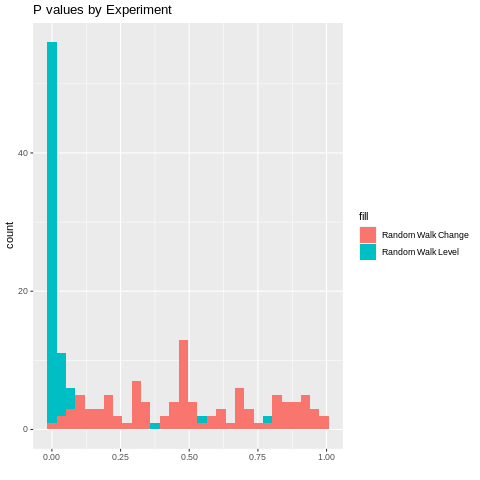

In [8]:
%%R
ggplot(df_2) + 
    #geom_histogram(aes(x = df_0$pvalues, fill = "White Noise Level")) + 
    geom_histogram(aes(x = df_1$pvalues, fill = "Random Walk Level")) + 
    geom_histogram(aes(x = df_2$pvalues, fill = "Random Walk Change")) + 
    ggtitle("P values by Experiment") +
    labs(x = "");

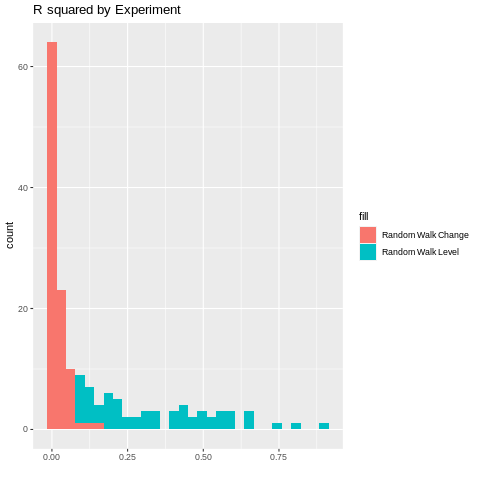

In [9]:
%%R
ggplot(df_2) + 
    #geom_histogram(aes(x = df_0$rsquared, fill = "White Noise Level")) + 
    geom_histogram(aes(x = df_1$rsquared, fill = "Random Walk Level")) + 
    geom_histogram(aes(x = df_2$rsquared, fill = "Random Walk Change")) +
    ggtitle("R squared by Experiment") + 
    labs(x = "")

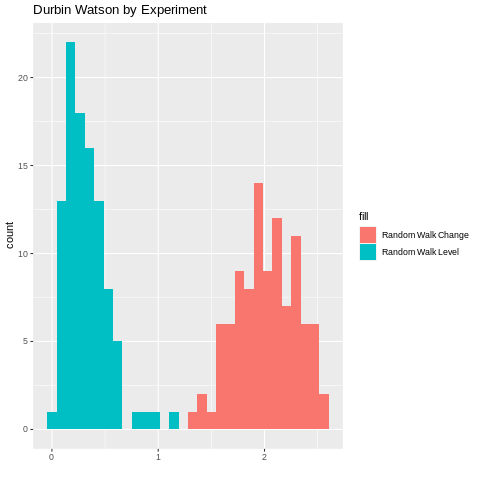

In [10]:
%%R
ggplot(df_2) + 
    #geom_histogram(aes(x = df_0$d_watson, fill = "White Noise Level")) + 
    geom_histogram(aes(x = df_1$d_watson, fill = "Random Walk Level")) + 
    geom_histogram(aes(x = df_2$d_watson, fill = "Random Walk Change")) + 
    ggtitle("Durbin Watson by Experiment") +
    labs(x = "");


# iii.Práctica

**Consignas**

0. Repita el experimento de Ruido Blanco para diferentes valores críticos α : 0.05, 0.1,0.2,0.5. ¿Cuál fue el porcentaje de coeficientes significativos obtenidos en cada caso? ¿Por qué ocurre esto?

1. Repetir el experimento de Random Walk para t=25, t=100 y t=1000. ¿Cómo evolucionan los resultados para los distintos lapsos muestrales? ¿Por qué cree que ocurre esto? ¿Cómo se relacionan los resultados obtenidos con la definición del estadístico?

2. Replicar el Segundo Experimento realizado por Granger & Newbold con m 1 a 5 para Ruido Blanco, Caminata Aleatoria y ARIMA(0,1,1) y sus respectivas diferencias. Comente sobre los resultados obtenidos. ¿Coinciden con los registrados en el paper?

3. Graficar los principales resultados con histogramas para las distribuciones de los procesos de los experimentos. Comente los resultados obtenidos.



**Condiciones de Entrega**

0. Entregable: notebook + pdf

1. Límite de Entrega: 15/09/2022 23:59 hs